In this assignment we perform sentiment analysis on movie review using the train.csv data from https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data

BY the end we compare the accouracy obatined by CountVectorizer and TF-IDF.

In [5]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sb
import zipfile

In [6]:
with zipfile.ZipFile('/content/train.tsv.zip', 'r') as train_extract:
  train_extract.extract('train.tsv')

In [7]:
data=pd.read_csv('train.tsv',sep='\t')
data

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [8]:
data.head(
)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [9]:
data.keys()

Index(['PhraseId', 'SentenceId', 'Phrase', 'Sentiment'], dtype='object')

In [10]:
from textblob import TextBlob
from statistics import mean

data['polarity'] = data['Phrase'].map(lambda text: TextBlob(text).sentiment.polarity)
data


,PhraseId,SentenceId,Phrase,Sentiment,polarity
0,1,1,A series of escapades demonstrating the adage ...,1,0.4
1,2,1,A series of escapades demonstrating the adage ...,2,0.7
2,3,1,A series,2,0.0
3,4,1,A,2,0.0
4,5,1,series,2,0.0
...,...,...,...,...,...
156055,156056,8544,Hearst 's,2,0.0
156056,156057,8544,forced avuncular chortles,1,-0.3
156057,156058,8544,avuncular chortles,3,0.0
156058,156059,8544,avuncular,2,0.0


In [11]:
data['Sentiment'].value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

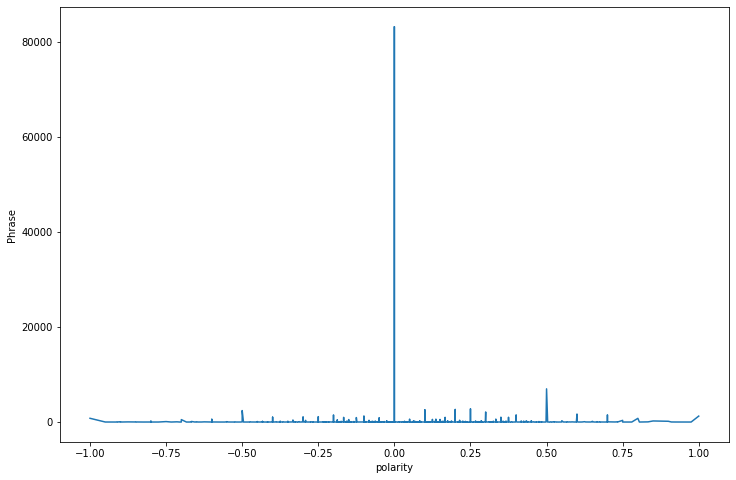

In [14]:
# Distribution of Review Documents

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.lineplot(x = data.groupby(data['polarity']).count()['Phrase'].index ,y = data.groupby(data['polarity']).count()['Phrase'])

In [15]:
#generating Document term matrix

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
tokenizer=token.tokenize
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = tokenizer)
text_cts= cv.fit_transform(data['Phrase'])
y=data['Sentiment']

In [16]:
import numpy as np
print(np.array(text_cts))

  (0, 11671)	1
  (0, 4517)	1
  (0, 3444)	1
  (0, 294)	1
  (0, 5735)	2
  (0, 5751)	1
  (0, 5512)	1
  (0, 9065)	1
  (0, 593)	1
  (0, 584)	1
  (0, 12673)	1
  (1, 11671)	1
  (1, 4517)	1
  (1, 3444)	1
  (1, 294)	1
  (1, 5735)	1
  (1, 5751)	1
  (2, 11671)	1
  (4, 11671)	1
  (5, 4517)	1
  (5, 3444)	1
  (5, 294)	1
  (5, 5735)	1
  (5, 5751)	1
  (7, 4517)	1
  :	:
  (156050, 11305)	1
  (156050, 9054)	1
  (156051, 11305)	1
  (156051, 9054)	1
  (156052, 11305)	1
  (156053, 11281)	1
  (156053, 1281)	1
  (156053, 5252)	1
  (156053, 6156)	1
  (156053, 1006)	1
  (156053, 2271)	1
  (156054, 11281)	1
  (156054, 5252)	1
  (156054, 6156)	1
  (156054, 1006)	1
  (156054, 2271)	1
  (156055, 11281)	1
  (156055, 6156)	1
  (156056, 5252)	1
  (156056, 1006)	1
  (156056, 2271)	1
  (156057, 1006)	1
  (156057, 2271)	1
  (156058, 1006)	1
  (156059, 2271)	1


In [17]:
#splitting the data into train and test 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_cts, y, test_size=0.3, random_state=4)

In [18]:
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
x_traincv= MultinomialNB().fit(X_train, y_train)
predicted= x_traincv.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted)) 

MultinomialNB Accuracy: 0.6074159511299073


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(data['Phrase'])

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, data['Sentiment'], test_size=0.3, random_state=123)

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.5865265496176684


With CountVector we obtained a classification rate of 60.74, which isn't a  sufficient accuracy. 

With Tfidf the obtained accuracy is 58.65 that is less than what is been offered by count vectorization.

Countvector is suitable for the above dataset